# Thông tin
1. **MSSV:** 22521586
2. **Họ Tên:** Trần Võ Lâm Trường
3. **Bài tập:** Bài tập 2
4. **Ngày thực hiện:** 28/3/2024  


# Kết nối Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# Đặt đường dẫn cho bài tập

In [ ]:
# Khai báo đường dẫn đến môn học CS231.O21.2
import os
dir_monhoc = '/gdrive/My Drive/UIT/Semester 4/[CS231] Computer Vision/Assignment/CS231.O21.2'

# Khai báo đường dẫn đến bài tập
dir_baitap = os.path.join (dir_monhoc, 'Baitap', 'Baitap2')
dir_train = os.path.join(dir_baitap, 'images', 'train')
dir_test = os.path.join(dir_baitap, 'images', 'test')

# Yêu cầu
Dựa trên các ảnh đã cho trước trong thư mục train, hãy xác định các ảnh trong tập test là hình: hình tròn, tam giác, hình chữ nhật ?

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


## Function

In [ ]:
def computeHistogram(pathfilename):
    img = cv.imread(pathfilename,0)
    hist = cv.calcHist([img],[0],None,
                       [256],[0,256])
    size = img.shape[0]*img.shape[1]
    hist = hist / size
    return hist

In [ ]:
def computeAllHistograms(ltrain, ltest, dir_train, dir_test ):
  train_hist = []
  test_hist = []
  for train in ltrain:
    train_path = os.path.join(dir_train, train)
    train_hist.append(calFeartureVector(train_path))
  for test in ltest:
    test_path = os.path.join(dir_test, test)
    test_hist.append(calFeartureVector(test_path))
  return train_hist, test_hist

In [ ]:
def sobel_filters(img):
    Sx=np.array([[-1,0,1],[-2,0,2],[-1,0,1]],np.float32)
    Sy=np.array([[1,2,1],[0,0,0],[-1,-2,-1]],np.float32)

    Ix = cv.filter2D(img, -1, Sx)
    Iy = cv.filter2D(img, -1, Sy)

    G=np.hypot(Ix,Iy)
    G=G/G.max()*255
    theta=np.arctan2(Iy,Ix)

    return Ix,Iy,G,theta

In [ ]:
def calFeartureVector(img_src):
  img = cv.imread(img_src,0)
  img_dst = img.copy()
  img_dst = cv.resize(img_dst, (256, 256))
  Ix, Iy, G, theta  = sobel_filters(img_dst)

  fearture = []
  for i in range(G.shape[0]):
    tmp = 0
    for j in range(G.shape[1]):
      tmp = tmp + G[i,j]
    fearture.append(tmp)

  for j in range(G.shape[1]):
    tmp = 0
    for i in range(G.shape[0]):
      tmp = tmp + G[i,j]
    fearture.append(tmp)
  return fearture

In [ ]:
def show2image(img_src, img_rst, title1, title2):
  img = cv.imread(img_src)
  plt.figure(figsize=(20, 20))
  # show img src
  plt.subplot(1,2,1)
  plt.title(title1)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  plt.imshow(img, interpolation='bicubic')

  img_rst = cv.imread(img_rst)
  # show img result
  plt.subplot(1,2,2)
  plt.title(title2)
  img_rst = cv.cvtColor(img_rst, cv.COLOR_BGR2RGB)
  plt.imshow(img_rst, interpolation='bicubic')


# Thực hiện

In [ ]:
ltrain = os.listdir(dir_train)
ltest = os.listdir(dir_test)

In [ ]:
train_hist, test_hist = computeAllHistograms(ltrain, ltest, dir_train, dir_test)
train_hist = np.squeeze(np.array(train_hist))
test_hist = np.squeeze(np.array(test_hist))

from scipy.spatial import distance
D_cos = distance.cdist(test_hist, train_hist, 'correlation')
min_indexes = []
for each in D_cos:
  min_indexes.append(np.argmin(each))


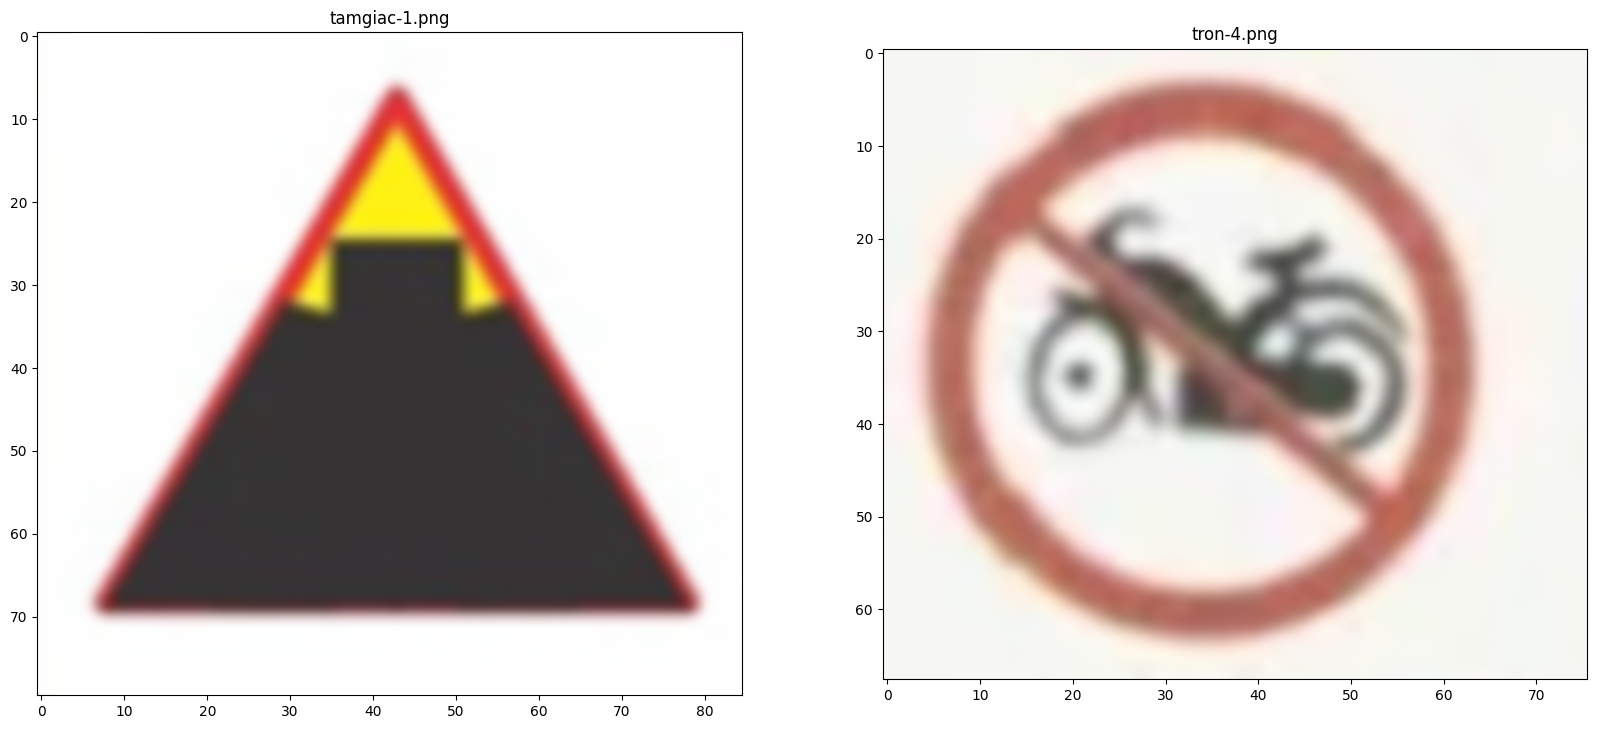

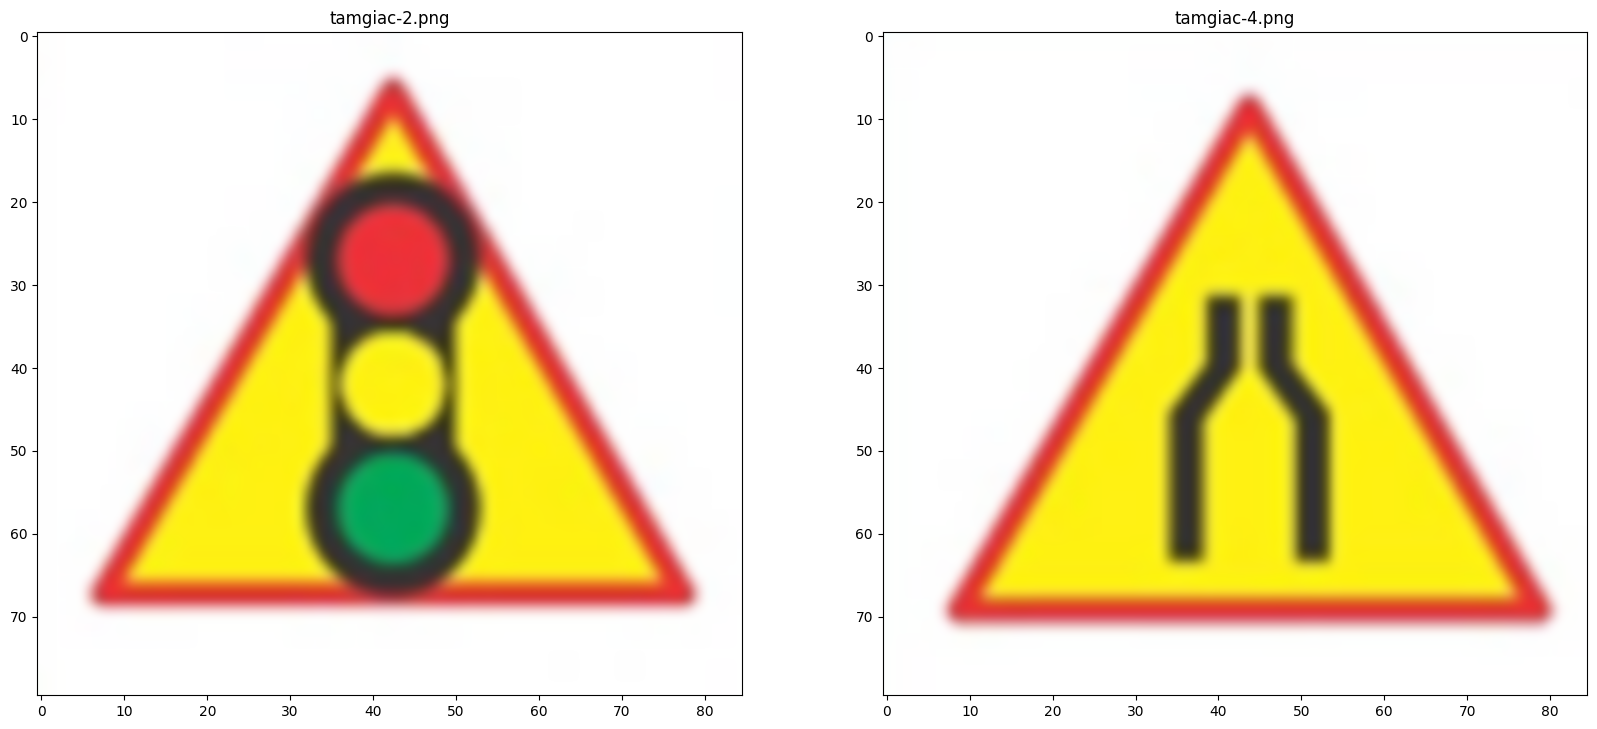

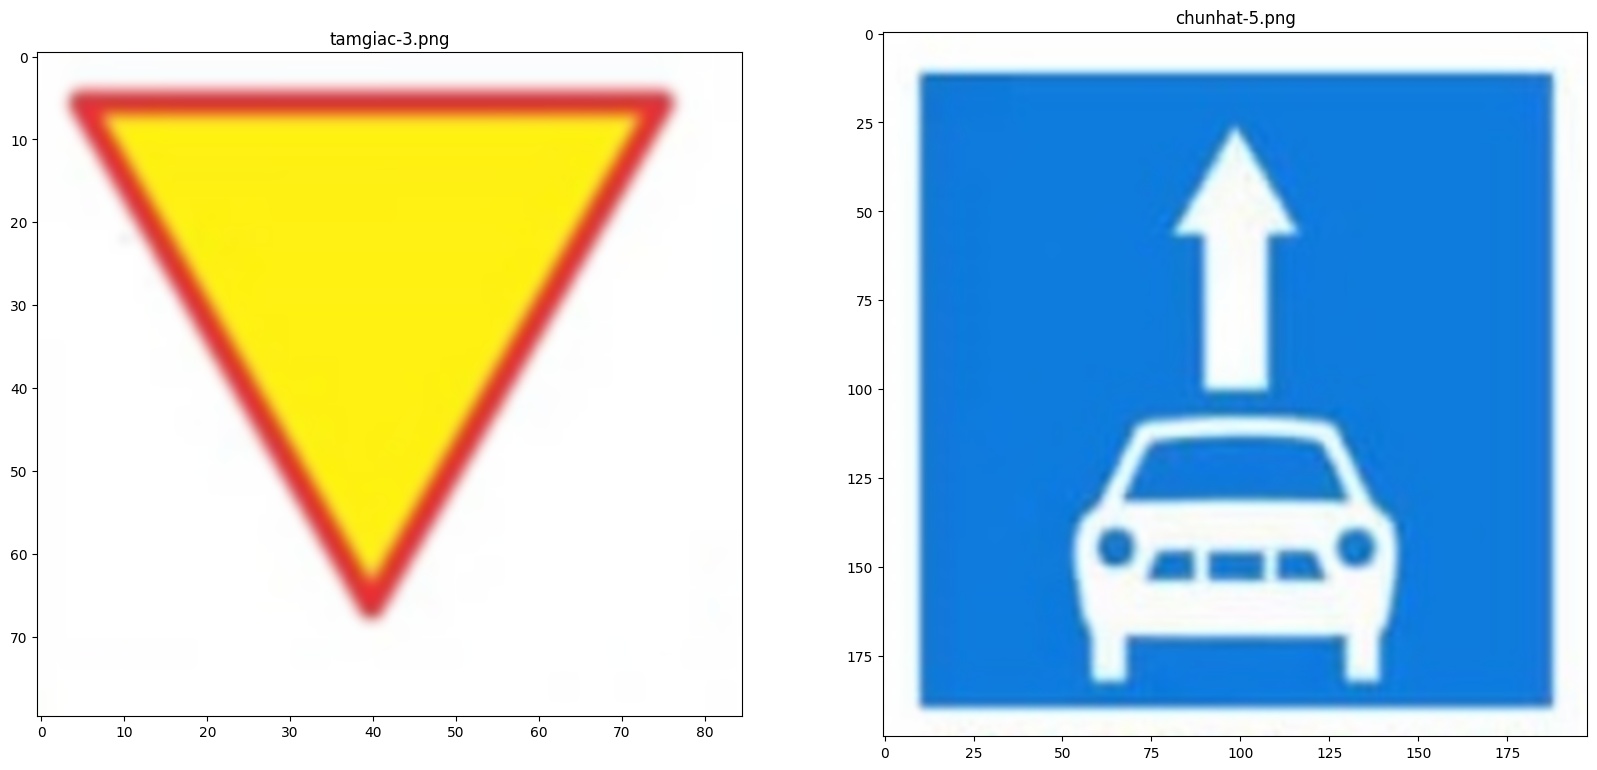

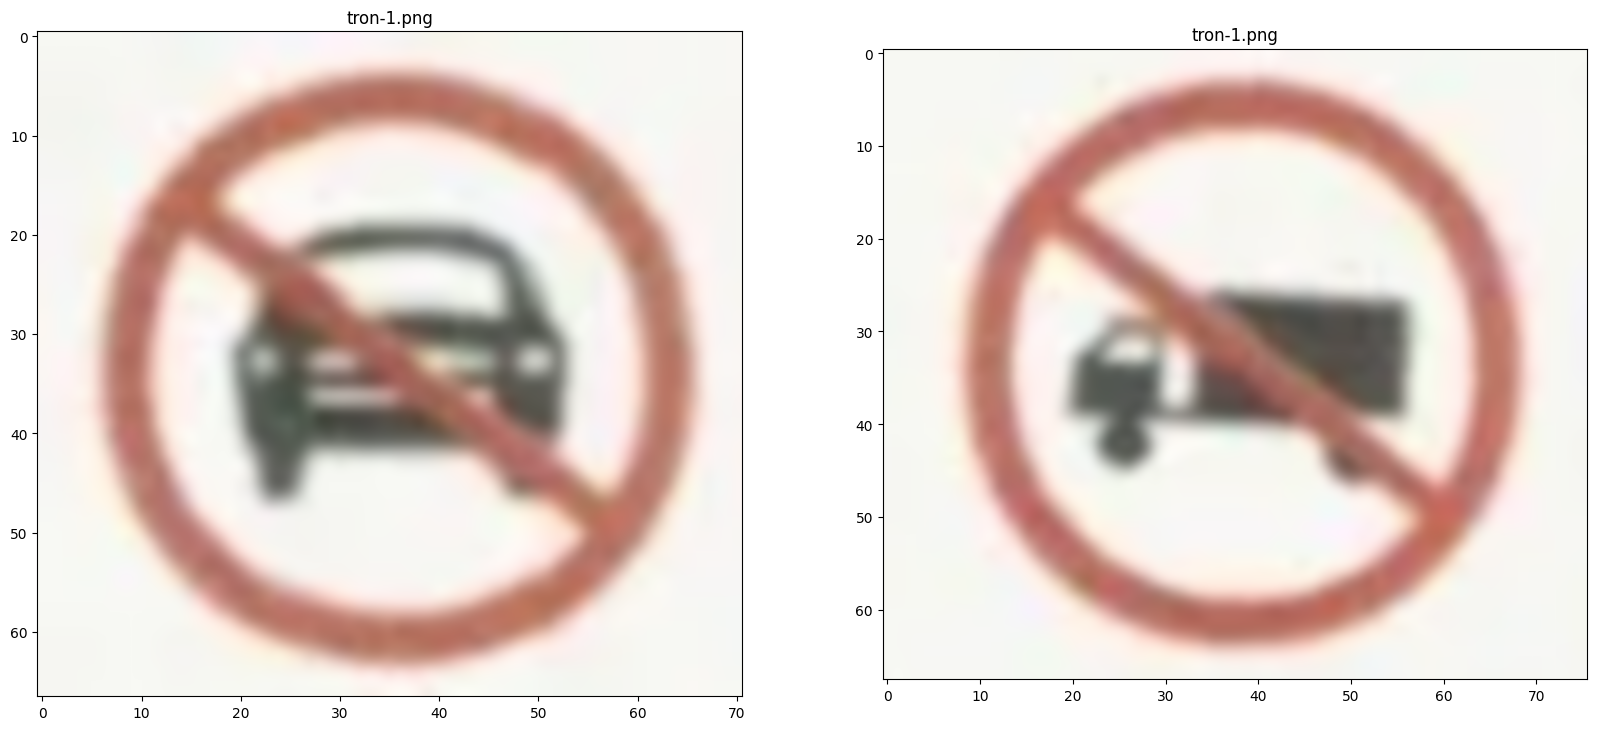

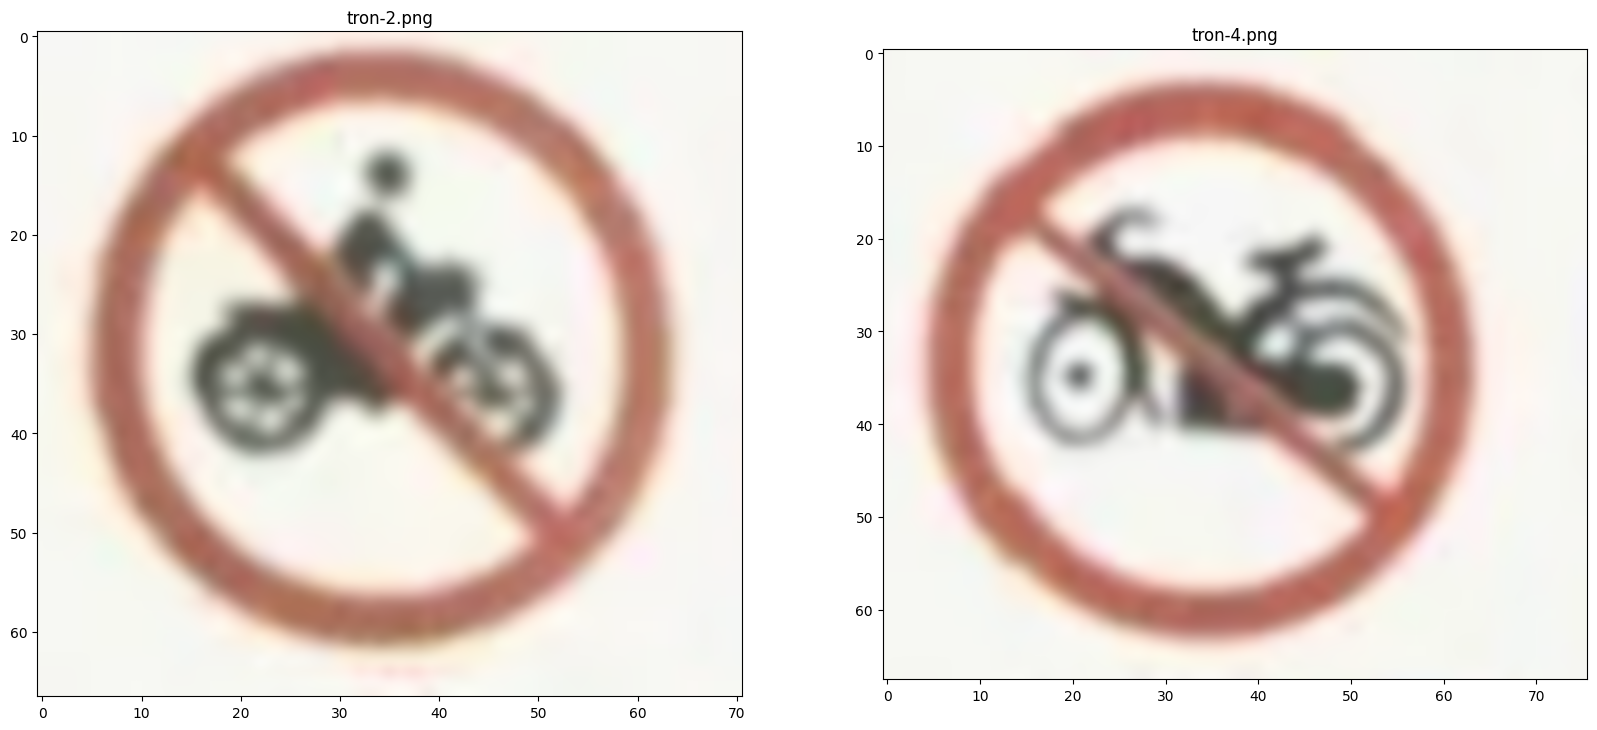

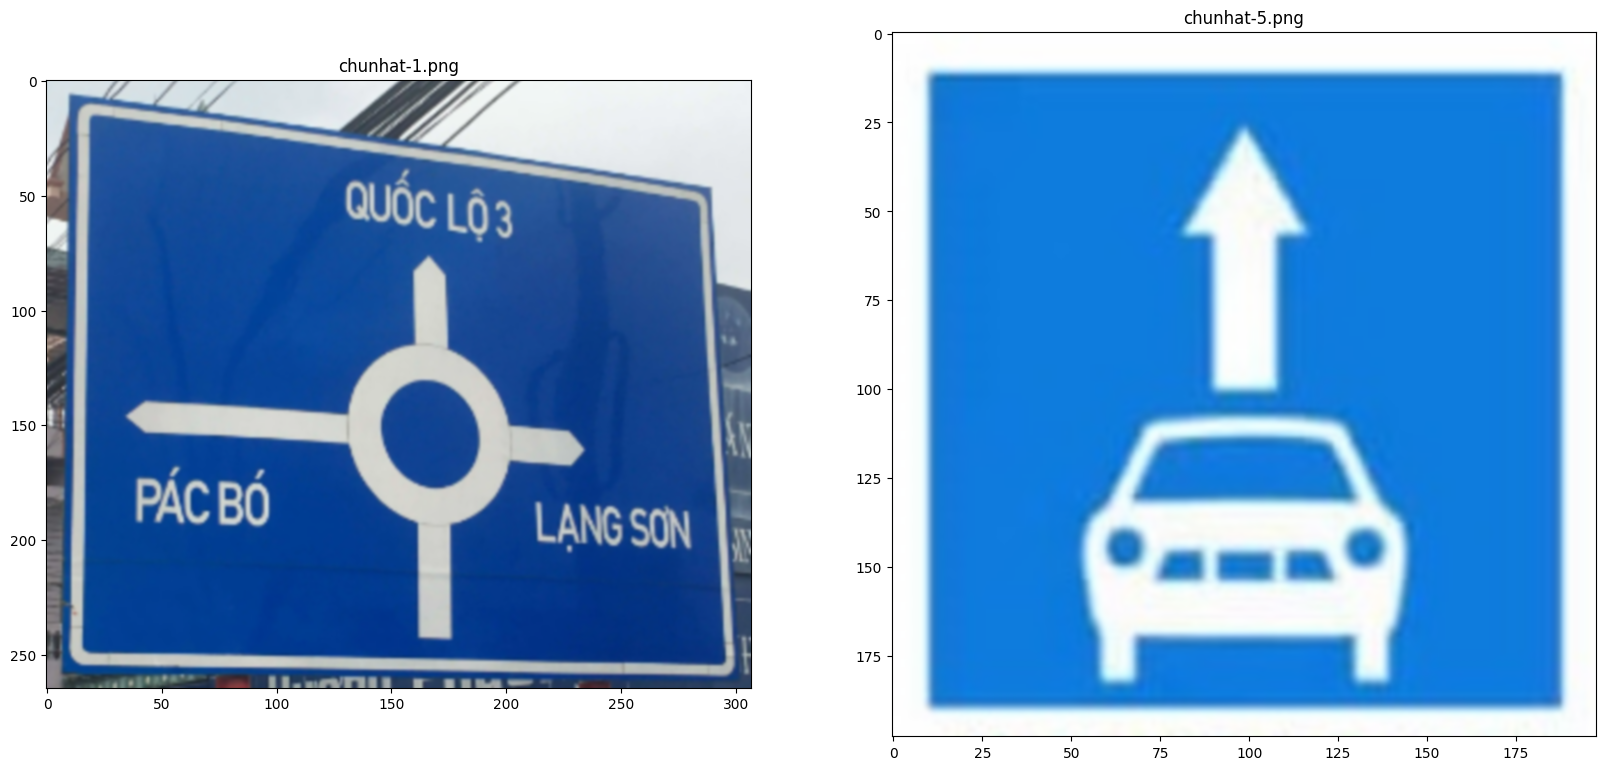

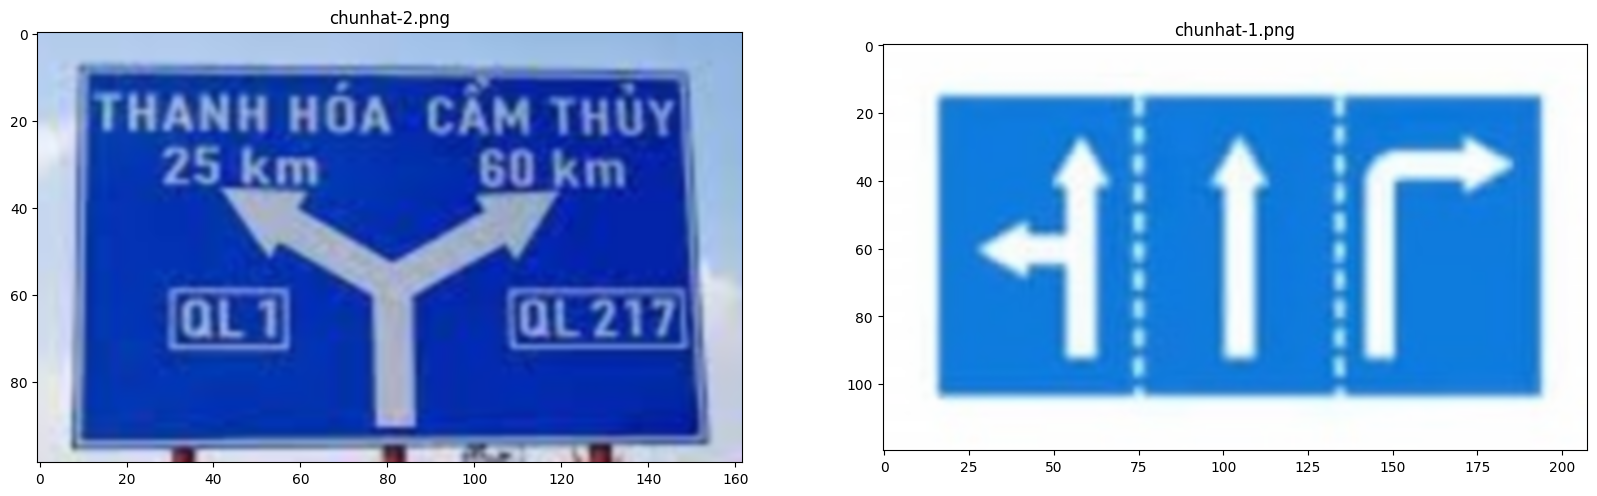

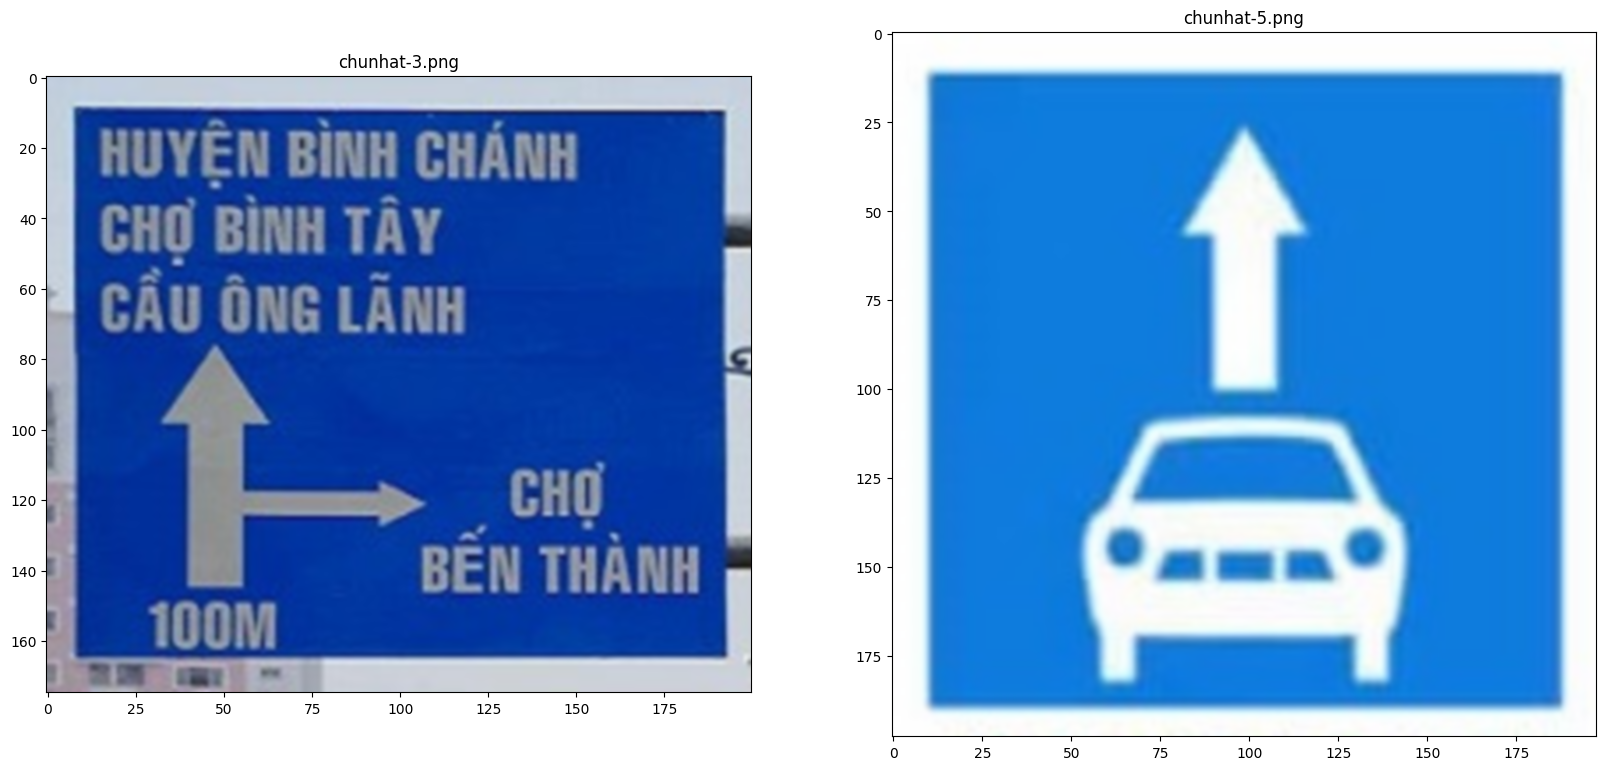

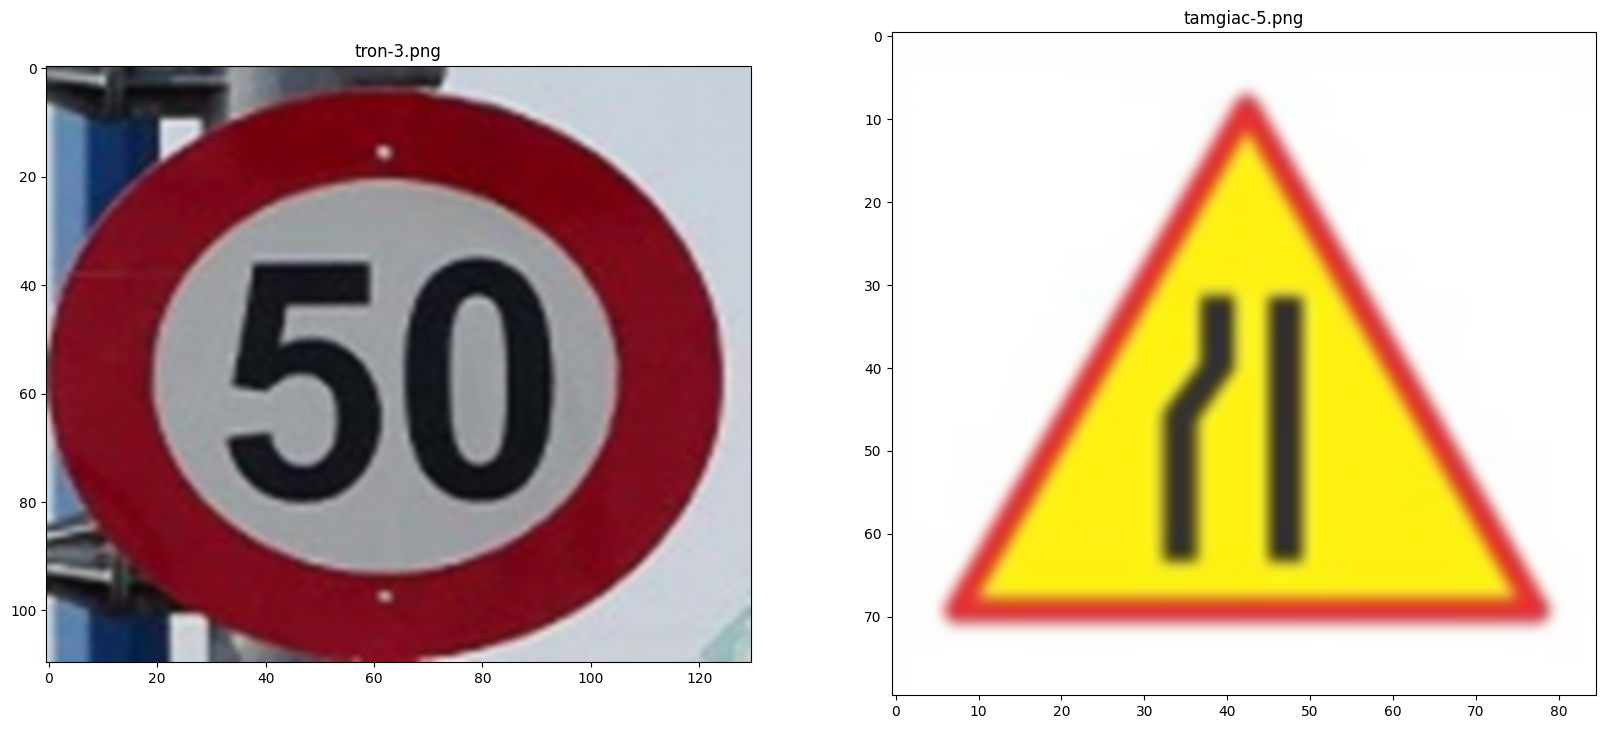

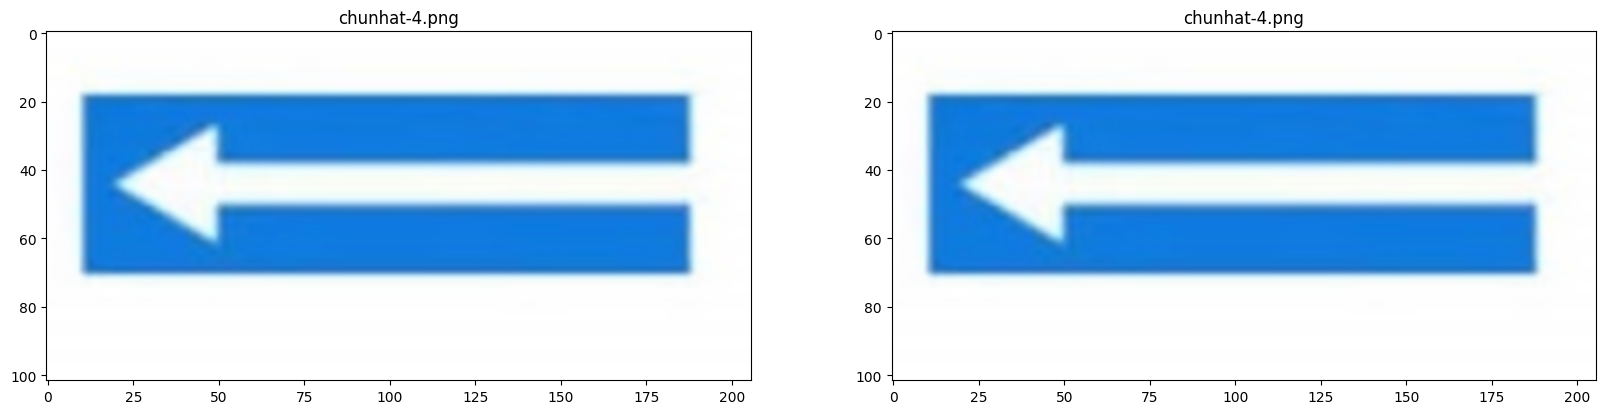

In [ ]:
for i in range(10):
  test_path = os.path.join(dir_test, ltest[i])
  result_path = os.path.join(dir_train, ltrain[min_indexes[i]])
  title1 = ltest[i]
  title2 = ltrain[min_indexes[i]]
  show2image(test_path, result_path, title1, title2)

In [ ]:
D_cos1 = distance.cdist(test_hist, train_hist, 'cosine')
min_indexes_cosine = []
for each in D_cos:
  min_indexes_cosine.append(np.argmin(each))

In [ ]:
for i in range(10):
  test_path = os.path.join(dir_test, ltest[i])
  result_path = os.path.join(dir_train, ltrain[min_indexes_cosine[i]])
  title1 = ltest[i]
  title2 = ltrain[min_indexes_cosine[i]]
  show2image(test_path, result_path, title1, title2)